In [15]:
import numpy as np
import pandas as pd

In [16]:
#df=pd.read_csv('datasets/afaiLabeling/Lnormal2.csv');
df=pd.read_csv('datasets/afaiLabeling/Lhping3.csv',nrows=4500);
#df3=pd.read_csv('datasets/afaiLabeling/nmap.csv');

In [17]:
df1= df1.merge(df2, how='outer')
df= df1.merge(df3, how='outer')

NameError: name 'df2' is not defined

In [18]:
#randomise the indexes but keep the original order of the rows
df = df.sample(frac=1, random_state = 42).reset_index(drop=True)

In [19]:
df = df.drop(columns=['timestamp','src_ip', 'dst_ip'])

In [20]:
df

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,label
0,5704,80,6,7245901,186.312234,3.450227,2.208145,1.242082,16,9,...,0,0,54,54,0,16,9,864,486,DDoS
1,7887,80,6,7274137,118.776977,2.199574,1.649680,0.549893,12,4,...,0,0,54,54,0,12,4,648,216,DDoS
2,7175,80,6,6371521,127.128201,2.354226,1.726432,0.627794,11,4,...,0,0,54,54,0,11,4,594,216,DDoS
3,7193,80,6,6371786,127.122913,2.354128,1.726361,0.627767,11,4,...,0,0,54,54,0,11,4,594,216,DDoS
4,3410,80,6,8884876,158.021339,2.926321,1.913364,1.012957,17,9,...,0,0,54,54,0,17,9,918,486,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,8627,80,6,7284706,88.953487,1.647287,1.235465,0.411822,9,3,...,0,0,54,54,0,9,3,486,162,DDoS
4496,3408,80,6,8880077,158.106737,2.927903,1.914398,1.013505,17,9,...,0,0,54,54,0,17,9,918,486,DDoS
4497,7293,80,6,6372961,144.046072,2.667520,1.882955,0.784565,12,5,...,0,0,54,54,0,12,5,648,270,DDoS
4498,7973,80,6,7275248,133.603693,2.474142,1.786881,0.687262,13,5,...,0,0,54,54,0,13,5,702,270,DDoS


In [21]:
# changing attack labels into two categories 'normal' and 'abnormal'
df['label'] = pd.DataFrame(df.label.map(lambda x:'Normal' if x=='Normal' else 'Abnormal'))

In [22]:
print(df['label'].value_counts())

label
Abnormal    4500
Name: count, dtype: int64


<Axes: xlabel='label'>

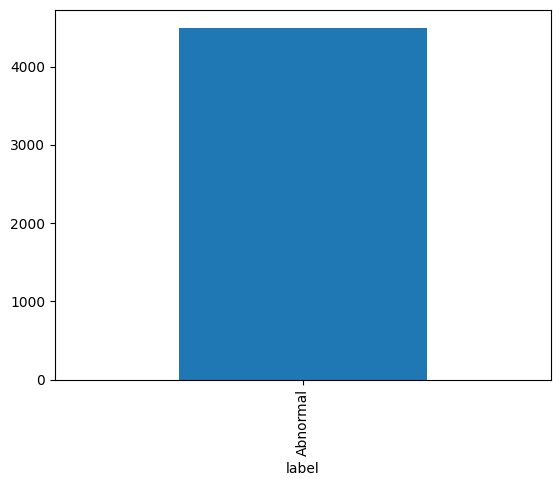

In [23]:
df['label'].value_counts().plot(kind='bar')


In [24]:
# Prepare the dataset for feature selection
X = df.drop('label', axis=1)
y = df['label']

In [25]:
 top_features = ['dst_port', 'tot_fwd_pkts', 'flow_byts_s', 'fwd_header_len', 'fwd_pkts_s', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'subflow_fwd_pkts', 'init_bwd_win_byts']
# for attack classify :top_features = ['src_port', 'dst_port', 'protocol', 'flow_pkts_s', 'flow_iat_max', 'bwd_iat_tot', 'bwd_iat_max', 'bwd_header_len', 'bwd_pkts_s', 'init_bwd_win_byts']

In [26]:
X = X[top_features]

In [12]:
X

,dst_port,tot_fwd_pkts,flow_byts_s,fwd_header_len,fwd_pkts_s,pkt_len_max,pkt_len_mean,pkt_size_avg,subflow_fwd_pkts,init_bwd_win_byts
0,443,10,185781.990521,200,243.042897,2974,382.200000,382.200000,10,65535
1,443,8,48989.512724,160,41.907197,3940,550.117647,550.117647,8,65535
2,443,13,20384.730454,260,52.558805,1299,186.740741,186.740741,13,65535
3,443,2,6725.401843,40,44.836012,93,75.000000,75.000000,2,65535
4,443,11,48774.300671,220,31.709061,6686,805.714286,805.714286,11,65535
...,...,...,...,...,...,...,...,...,...,...
4042,53,1,40840.311444,8,146.907595,195,139.000000,139.000000,1,0
4043,80,5,1117.322811,100,6.526418,239,85.600000,85.600000,5,65535
4044,443,2,6317.518479,40,42.116790,93,75.000000,75.000000,2,65535
4045,53,1,29065.200314,8,98.193244,214,148.000000,148.000000,1,0


In [13]:
y

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
4042    Normal
4043    Normal
4044    Normal
4045    Normal
4046    Normal
Name: label, Length: 4047, dtype: object

In [14]:
X.to_csv('xnormmatra.csv',index=False)
y.to_csv('ynormmatra.csv',index=False)